# Reviewing Chap 2 of Sutton's Introduction to RL book

In [1]:
import numpy as np

In [99]:
gen = np.random.default_rng()
gen.integers(0, 3)

0

In [100]:
class Bandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.rand_gen = np.random.default_rng()
        self.reward_base = self.rand_gen.normal(0, 1.0, num_arms)
    
    def get_reward(self, arm):
        arm = int(arm)
        if arm < 0 or arm >= self.num_arms:
            raise ValueError("Invalid arm: %d selected" % arm)
        return self.reward_base[arm] + self.rand_gen.normal()

In [101]:
class EAgent:
    def __init__(self, num_arms, epsilon):
        self.rg = np.random.default_rng()
        self.value_estimates = self.rg.normal(size=num_arms)
        self.reward_store = np.zeros((num_arms, 2))
        self.epsilon = epsilon
        self.num_arms = num_arms
    
    def choose_arm(self):
        if self.rg.random() < self.epsilon:
            return self.rg.integers(0, self.num_arms)
        else:
            return np.argmax(self.value_estimates)
    
    def _update_value_estimates(self, arm, reward):
        self.reward_store[arm, 0] += reward
        self.reward_store[arm, 1] += 1
        self.value_estimates[arm] = self.reward_store[arm, 0]/self.reward_store[arm, 1]
    
    def do_pull(self, bandit):
        arm = self.choose_arm()
        reward = bandit.get_reward(arm)
        self._update_value_estimates(arm, reward)
        return reward

In [111]:
num_tasks = 2000
num_pulls = 3000

In [112]:
bandit = Bandit(10)
agent_greedy = EAgent(10, 0)
agent_e001 = EAgent(10, 0.01)
agent_e01 = EAgent(10, 0.1)

In [113]:
agents = [agent_greedy, agent_e001, agent_e01]
rewards = np.zeros((len(agents), num_pulls))

In [114]:
agent_names = ['greedy', 'e001', 'e01']
colors = ['b', 'y', 'r']

In [115]:
for idx in range(num_tasks):
    for jdx in range(num_pulls):
        for kdx in range(len(agents)):
            rewards[kdx, jdx] += agents[kdx].do_pull(bandit)

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
np.concatenate

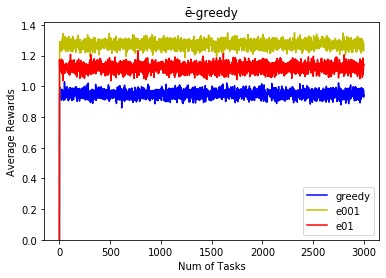

In [121]:
fig, ax = plt.subplots()
avg = rewards/num_trials
for idx in range(len(agents)):
    ax.plot(np.concatenate([np.array([0]), avg[idx]]), c=colors[idx], label=agent_names[idx])
ax.set_title('ē-greedy')
ax.set_xlabel('Num of Tasks')
ax.set_ylim(ymin=0)
_ =ax.set_ylabel('Average Rewards')
ax.legend(loc='best')

In [49]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [122]:
np.cumsum(2)

array([2])